# RAINFALL AND TEMPERATURE ANALYSIS FOR SEATTLE - WASHINGTON

Rainfall data was obtained from the Climate Hazards Group InfraRed Precipitation with Station data (CHIRPS, https://developers.google.com/earth-engine/datasets/catalog/UCSB-CHG_CHIRPS_DAILY) while Temperature data was obtained from the MODIS Terra satellite obsversations (https://disc.gsfc.nasa.gov/)

### The objective is to carry out exploratory data analysis and to check for autocorrelation in the data.

In [44]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
mpl.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] =14

In [45]:
df = pd.read_csv(r'C:\Users\opio\Desktop\Data Science\python_projects\rainfall\rain_seattle.csv')
df_temp = pd.read_csv(r'C:\Users\opio\Desktop\Data Science\python_projects\rainfall\seattle_temp.csv')

print('RAINFALL')
print(df.head())
print('==='*20)
print('TEMPERATURE')
print(df_temp.head())

RAINFALL
  system:time_start  precipitation
0        2000-01-01          0.000
1        2000-01-02          5.063
2        2000-01-03         26.839
3        2000-01-04          0.542
4        2000-01-05          9.904
TEMPERATURE
         time   mean_MOD11C3_006_LST_Day_CMG
0  2000-02-01                     275.196259
1  2000-03-01                     277.331970
2  2000-04-01                     284.499451
3  2000-05-01                     284.872314
4  2000-06-01                     290.712799


### Data Cleaning and Preparation

In [46]:
# Get Data general information
def get_general_info(df):
    print('CHECK FOR DATA TYPES')
    print(df.dtypes)
    print('---'*20)
    print('CHECK FOR MISSING DATA')
    print(df.isnull().sum())
    print('---'*20)

    print('CHECK META DATA')
    print(df.info)
    print('---END---')

In [47]:
print('RAINFALL')
get_general_info(df)

print('TEMPERATURE')
get_general_info(df_temp)

RAINFALL
CHECK FOR DATA TYPES
system:time_start     object
precipitation        float64
dtype: object
------------------------------------------------------------
CHECK FOR MISSING DATA
system:time_start    0
precipitation        0
dtype: int64
------------------------------------------------------------
CHECK META DATA
<bound method DataFrame.info of      system:time_start  precipitation
0           2000-01-01          0.000
1           2000-01-02          5.063
2           2000-01-03         26.839
3           2000-01-04          0.542
4           2000-01-05          9.904
...                ...            ...
8025        2021-12-21          0.713
8026        2021-12-22          0.002
8027        2021-12-23          0.000
8028        2021-12-24          0.000
8029        2021-12-25          7.073

[8030 rows x 2 columns]>
---END---
TEMPERATURE
CHECK FOR DATA TYPES
time                              object
 mean_MOD11C3_006_LST_Day_CMG    float64
dtype: object
-------------------------

In [48]:
# Rename columns and change the first column to type datetime
cols_rain = ['date', 'rain']
df.columns = cols_rain

cols_temp = ['date', 'temp']
df_temp.columns = cols_temp

df['date'] = pd.to_datetime(df['date'], format=('%Y-%m-%d'))
df_temp['date'] = pd.to_datetime(df_temp['date'], format=('%Y-%m-%d'))

print('RAINFALL')
print(df.dtypes)
print('TEMPERATURE')
print(df_temp.dtypes)

RAINFALL
date    datetime64[ns]
rain           float64
dtype: object
TEMPERATURE
date    datetime64[ns]
temp           float64
dtype: object


In [49]:
# Create columns for year, month and seasons
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()

df_temp['year'] = df_temp['date'].dt.year
df_temp['month'] = df_temp['date'].dt.month
df_temp['month_name'] = df_temp['date'].dt.month_name()

# For Temperature, I will create a new column with temperature converted to degrees celcius
df_temp['temp_deg'] = df_temp['temp'] - 273.15

print('RAINFALL')
print(df.head())
print('---'*20)
print('TEMPERATURE')
print(df_temp.head())

RAINFALL
        date    rain  year  month month_name
0 2000-01-01   0.000  2000      1    January
1 2000-01-02   5.063  2000      1    January
2 2000-01-03  26.839  2000      1    January
3 2000-01-04   0.542  2000      1    January
4 2000-01-05   9.904  2000      1    January
------------------------------------------------------------
TEMPERATURE
        date        temp  year  month month_name   temp_deg
0 2000-02-01  275.196259  2000      2   February   2.046259
1 2000-03-01  277.331970  2000      3      March   4.181970
2 2000-04-01  284.499451  2000      4      April  11.349451
3 2000-05-01  284.872314  2000      5        May  11.722314
4 2000-06-01  290.712799  2000      6       June  17.562799


### Exploratory Data Analysis

Text(0.5, 1.0, 'TEMPERATURE')

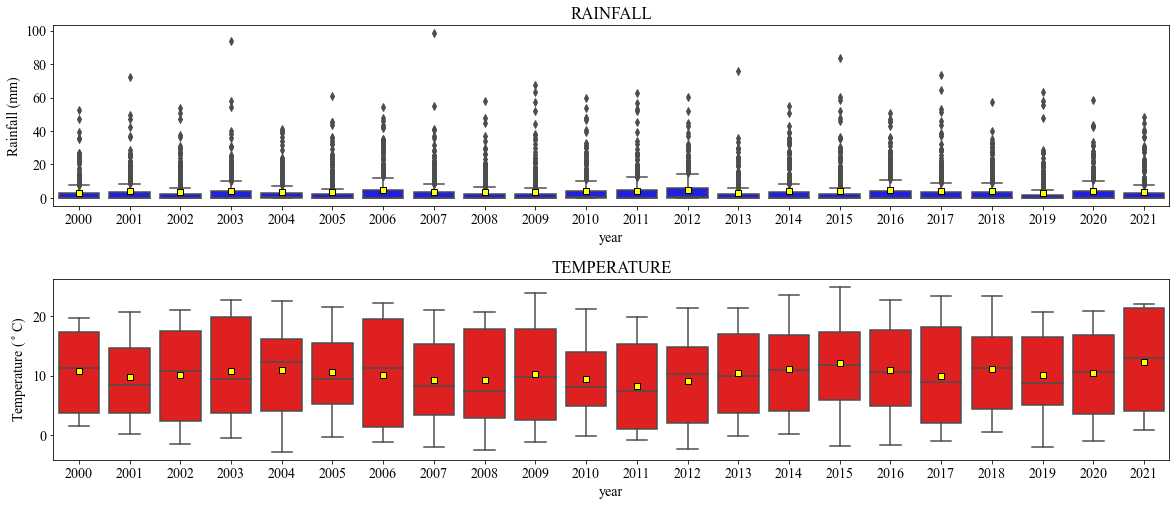

In [50]:
# Create box plots for each year and explain the variation
fig, ax = plt.subplots(figsize=(20,8))
plt.gcf().subplots_adjust(hspace=0.4)

plt.subplot(2,1,1)
sns.boxplot(data=df, x='year', y='rain', showmeans=True, color='blue',
           meanprops={"marker":"s","markerfacecolor":"yellow", "markeredgecolor":"black"})
plt.ylabel('Rainfall (mm)')
plt.title('RAINFALL')

plt.subplot(2,1,2)
sns.boxplot(data=df_temp, x='year', y='temp_deg', showmeans=True, color='red',
           meanprops={"marker":"s","markerfacecolor":"yellow", "markeredgecolor":"black"})
plt.ylabel('Temperature ($^\circ$C)')
plt.title('TEMPERATURE')

Text(0.5, 1.0, 'TEMPERATURE')

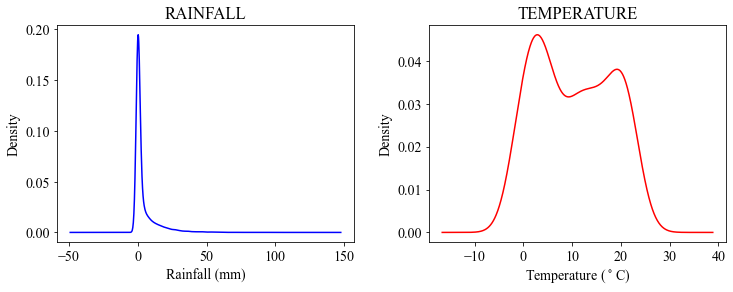

In [51]:
# Create Kernel density plots to check the most popular observation range
fig, ax = plt.subplots(figsize=(12,4))
plt.gcf().subplots_adjust(wspace=0.25)

plt.subplot(1,2,1)
#df['rain'].hist(density=True)
df['rain'].plot.kde(color='blue')
plt.xlabel('Rainfall (mm)')
plt.title('RAINFALL')

plt.subplot(1,2,2)
#df_temp['temp_deg'].hist(density=True)
df_temp['temp_deg'].plot.kde(color='red')
plt.xlabel('Temperature ($^\circ$C)')
plt.title('TEMPERATURE')

Text(0, 0.5, 'Temperature ($^\\circ$C)')

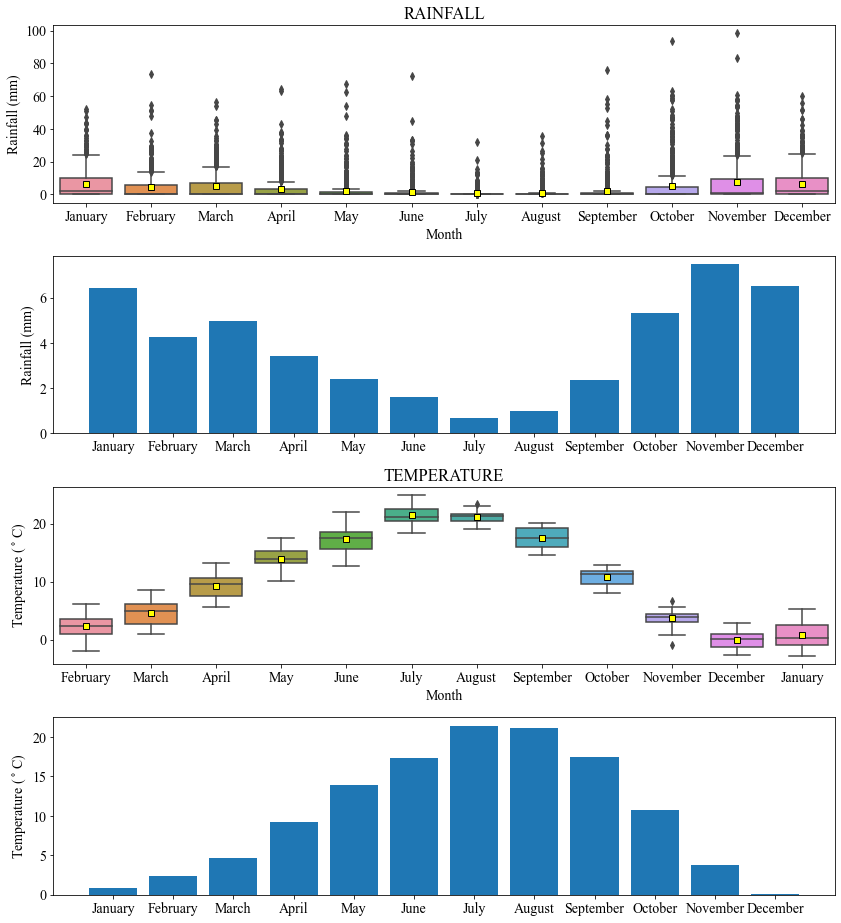

In [52]:
# Get monthly averages
df_month = df.groupby('month').mean()
df_month = df_month.drop(['year'], axis=1)
df_month = df_month.reset_index()
df_month['month_naming'] = df_month['month'].apply(lambda x: calendar.month_name[x])

df_temp_month = df_temp.groupby('month').mean()
df_temp_month = df_temp_month.drop(['year'], axis=1)
df_temp_month = df_temp_month.reset_index()
df_temp_month['month_naming'] = df_temp_month['month'].apply(lambda x: calendar.month_name[x])

# Create boxplots and a bar chart for each month
fig, ax = plt.subplots(figsize=(14,16))
plt.gcf().subplots_adjust(hspace=0.3)

plt.subplot(4,1,1)
sns.boxplot(data=df, x='month_name', y='rain', showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"yellow", "markeredgecolor":"black"})
plt.ylabel('Rainfall (mm)')
plt.xlabel('Month')
plt.title('RAINFALL')

plt.subplot(4,1,2)
plt.bar('month_naming', 'rain', data=df_month)
plt.ylabel('Rainfall (mm)')


plt.subplot(4,1,3)
sns.boxplot(data=df_temp, x='month_name', y='temp_deg', showmeans=True,
           meanprops={"marker":"s","markerfacecolor":"yellow", "markeredgecolor":"black"})
plt.ylabel('Temperature ($^\circ$C)')
plt.xlabel('Month')
plt.title('TEMPERATURE')

plt.subplot(4,1,4)
plt.bar('month_naming', 'temp_deg', data=df_temp_month)
plt.ylabel('Temperature ($^\circ$C)')

### Smooth using moving averages

In [53]:
# For Rainfall
moving_average_ninety_rain = df['rain'].rolling(window=90, axis=0).mean()
moving_average_thirty_rain = df['rain'].rolling(window=30, axis=0).mean()

# For Temperature
moving_average_12_month_temp = df_temp['temp_deg'].rolling(window=12, axis=0).mean()

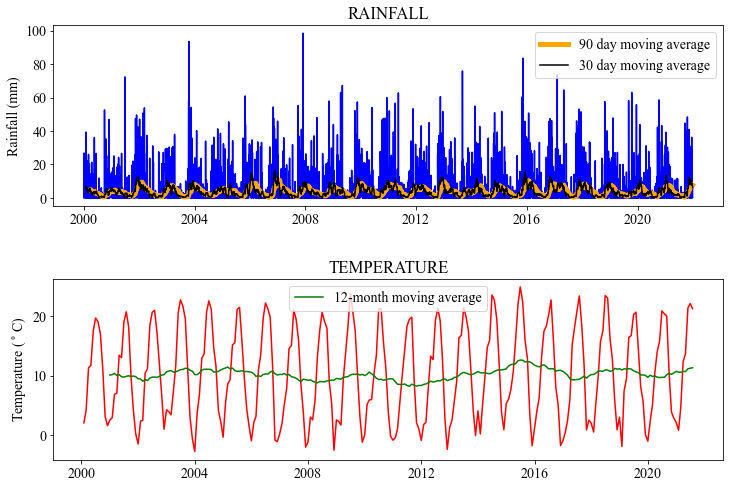

In [54]:
fig, ax = plt.subplots(figsize=(12,8))
plt.gcf().subplots_adjust(hspace=0.4)

plt.subplot(2,1,1)
plt.plot('date', 'rain', data=df, color='blue', label='')
plt.plot(df['date'], moving_average_ninety_rain, color='orange', label='90 day moving average', linewidth=5)
plt.plot(df['date'], moving_average_thirty_rain, color='black', label='30 day moving average')
plt.ylabel('Rainfall (mm)')
plt.title('RAINFALL')
plt.legend()

plt.subplot(2,1,2)
plt.plot('date', 'temp_deg', data=df_temp, color='red', label='')
plt.plot(df_temp['date'], moving_average_12_month_temp, color='green', label='12-month moving average')
plt.ylabel('Temperature ($^\circ$C)')
plt.title('TEMPERATURE')
plt.legend()

### Perform Autocorrelation Test 

Text(0.5, 1.0, 'TEMPERATURE')

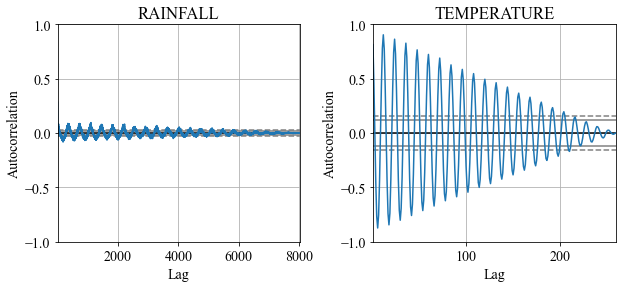

In [55]:
fig, ax = plt.subplots(figsize=(10,4))
plt.gcf().subplots_adjust(wspace=0.3)

plt.subplot(1,2,1)
pd.plotting.autocorrelation_plot(df['rain'])
plt.title('RAINFALL')

plt.subplot(1,2,2)
pd.plotting.autocorrelation_plot(df_temp['temp_deg'])
plt.title('TEMPERATURE')

## FINDINGS

### 1. There is a lot of variation in rainfall, but not in temperature. Extreme occurances were also common in rainfall.
### 2. Majority of the rainfall receipts are below 10 mm.
### 3. Majority of the temperature observations fall under one of the two peaks, that is, -5 to +5 degrees celcius and 19 to 26 degrees celcius. This corresponds to the peak of the winter and summer seasons respectively.
### 4. Rainfall is highest during the fall (September to November) and winter (December to February) seasons and lowest during the summer (June to August) season.
### 5. The temperature profile is opposite to that of rainfall. Temperature is highest during the summer (June to August) season and lowest during the winter (December to February) season.
### 6. Temperature has very little annual variation
### 7. There is no autocorrelation in the rainfall data while temperature interchangedly shows high positive (above 0.8) and negative autocorrelations (below -0.8) at lags of less than 10 months.